<a href="https://colab.research.google.com/github/zenafey/colab-notebooks/blob/main/prodia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prodia colab notebook for easy API use
made by @zenafey
You should get your personal api key of Prodia API before using, see https://docs.prodia.com/reference/getting-started-guide

Installing prodiapy module

In [ ]:
!pip install -U prodiapy

Import everything !

In [ ]:
from prodiapy import (
    StableDiffusion,
    StableDiffusionXL,
    Upscaler
)
from PIL import Image
from google.colab import files
import base64
import requests

API_KEY = "143d1cd5-39bd-4ad4-a5f2-d20e5a469fdb"

def show_image(url):
  return Image.open(requests.get(url, stream=True).raw)

def bytes_to_base64(bytes_data):
    return base64.b64encode(bytes_data).decode('utf-8')

# Stable Diffusion zone
Here are functions of /v1/sd endpoint


In [ ]:
pipe = StableDiffusion(
    api_key=API_KEY
)

### text2img

prodiapy 14:39:54.599 - [SUCCESS]: Got result: {'job': '733c4ba1-f5a6-4eda-b789-66aa8d592617', 'status': 'succeeded', 'imageUrl': 'https://images.prodia.xyz/733c4ba1-f5a6-4eda-b789-66aa8d592617.png'}


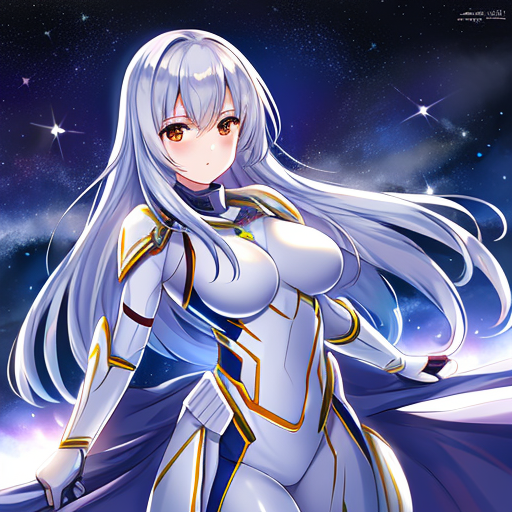

In [ ]:
job = pipe.generate(
    {
        'model': 'anythingV5_PrtRE.safetensors [893e49b9]',
        'prompt': 'space warrior, beautiful, female, ultrarealistic, soft lighting, 8k',
        'negative_prompt': '3d, cartoon, anime, (deformed eyes, nose, ears, nose), bad anatomy, ugly',
        'steps': 50,
        'cfg_scale': 7.5,
        'width': 512,
        'height': 512,
        'sampler': 'Euler',
        'seed': -1,
        'upscale': False
    }
)
result = pipe.wait_for(job)['imageUrl']

show_image(result)

### img2img

Saving thumbnail.jpeg to thumbnail.jpeg
prodiapy 14:34:52.374 - [SUCCESS]: Got result: {'job': '440bd0df-828b-4577-b767-8b9c08019afd', 'status': 'succeeded', 'imageUrl': 'https://images.prodia.xyz/440bd0df-828b-4577-b767-8b9c08019afd.png'}


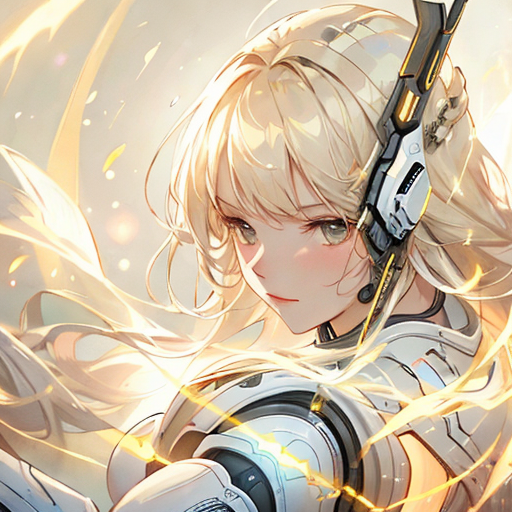

In [ ]:
uploaded = files.upload()

image_bytes = None
for obj in uploaded.values():
  image_bytes = obj

job = pipe.transform(
    {
        'imageData': bytes_to_base64(image_bytes),
        'model': 'blazing_drive_v10g.safetensors [ca1c1eab]',
        'prompt': 'space warrior, beautiful, female, ultrarealistic, soft lighting, 8k',
        'negative_prompt': '3d, cartoon, anime, (deformed eyes, nose, ears, nose), bad anatomy, ugly',
        'denoising_strength': 0.7,
        'steps': 50,
        'cfg_scale': 7.5,
        'width': 512,
        'height': 512,
        'sampler': 'DDIM',
        'seed': -1,
        'upscale': False
    }
)
result = pipe.wait_for(job)['imageUrl']

show_image(result)

### inpainting, controlnet are still under development but you can try to code it yourseld: https://docs.prodia.com/reference/controlnet , https://docs.prodia.com/reference/inpainting using methods pipe.inpainting(), pipe.controlnet()

### Constants

In [ ]:
# models
for model in pipe.models():
  print(model)

3Guofeng3_v34.safetensors [50f420de]
absolutereality_V16.safetensors [37db0fc3]
absolutereality_v181.safetensors [3d9d4d2b]
amIReal_V41.safetensors [0a8a2e61]
analog-diffusion-1.0.ckpt [9ca13f02]
anythingv3_0-pruned.ckpt [2700c435]
anything-v4.5-pruned.ckpt [65745d25]
anythingV5_PrtRE.safetensors [893e49b9]
AOM3A3_orangemixs.safetensors [9600da17]
blazing_drive_v10g.safetensors [ca1c1eab]
cetusMix_Version35.safetensors [de2f2560]
childrensStories_v13D.safetensors [9dfaabcb]
childrensStories_v1SemiReal.safetensors [a1c56dbb]
childrensStories_v1ToonAnime.safetensors [2ec7b88b]
Counterfeit_v30.safetensors [9e2a8f19]
cuteyukimixAdorable_midchapter3.safetensors [04bdffe6]
cyberrealistic_v33.safetensors [82b0d085]
dalcefo_v4.safetensors [425952fe]
deliberate_v2.safetensors [10ec4b29]
deliberate_v3.safetensors [afd9d2d4]
dreamlike-anime-1.0.safetensors [4520e090]
dreamlike-diffusion-1.0.safetensors [5c9fd6e0]
dreamlike-photoreal-2.0.safetensors [fdcf65e7]
dreamshaper_6BakedVae.safetensors [11

In [ ]:
# loras
for lora in pipe.loras():
  print(lora)

In [ ]:
# samplers
for sampler in pipe.samplers():
  print(sampler)

# Stable Diffusion XL zone
Here are functions of /v1/sdxl endpoint

In [ ]:
pipe = StableDiffusionXL(
    api_key=API_KEY
)

### text2img

prodiapy 14:14:16.216 - [SUCCESS]: Got result: {'job': '3b006300-59c1-469f-b62f-e79d5376c2b7', 'status': 'succeeded', 'imageUrl': 'https://images.prodia.xyz/3b006300-59c1-469f-b62f-e79d5376c2b7.png'}


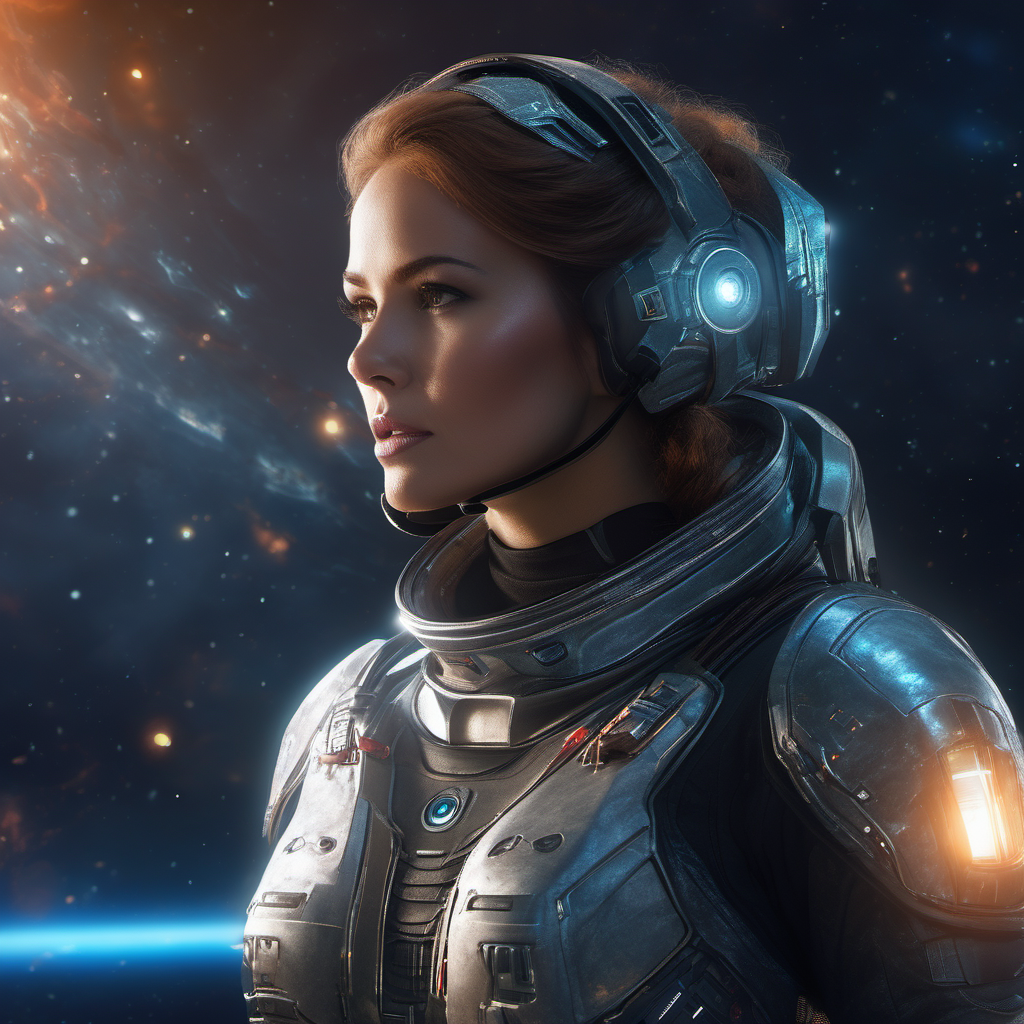

In [ ]:
job = pipe.generate(
    {
        'model': 'sd_xl_base_1.0.safetensors [be9edd61]',
        'prompt': 'space warrior, beautiful, female, ultrarealistic, soft lighting, 8k',
        'negative_prompt': '3d, cartoon, anime, (deformed eyes, nose, ears, nose), bad anatomy, ugly',
        'steps': 50,
        'cfg_scale': 7.5,
        'sampler': 'Euler',
        'seed': -1
    }
)
result = pipe.wait_for(job)['imageUrl']

show_image(result)

### Constants

In [ ]:
# models
for model in pipe.models():
  print(model)

dreamshaperXL10_alpha2.safetensors [c8afe2ef]
dynavisionXL_0411.safetensors [c39cc051]
juggernautXL_v45.safetensors [e75f5471]
realismEngineSDXL_v10.safetensors [af771c3f]
sd_xl_base_1.0.safetensors [be9edd61]


In [ ]:
# loras
for lora in pipe.loras():
  print(lora)

3lectronics_v10
blu3print_v10
c0nst3llation_v10
cyborg_style_xl-v10
LogoRedmond_v10
ParchartXL-v12
pixel-art-xl-v1.1
v0ng44g_p0rtr14t_v10
v0ng44g_p14nt1ng_v10
w00len_2500_v10
xl_more_art-full_v1


In [ ]:
# samplers
for sampler in pipe.samplers():
  print(sampler)

Euler
Euler a
LMS
Heun
DPM2
DPM2 a
DPM++ 2S a
DPM++ 2M
DPM++ SDE
DPM fast
DPM adaptive
LMS Karras
DPM2 Karras
DPM2 a Karras
DPM++ 2S a Karras
DPM++ 2M Karras
DPM++ SDE Karras


# Upscaler zone
here are all functions of /v1/upscale endpoint

In [ ]:
pipe = Upscaler(
    api_key=API_KEY
)

### upscale

Saving download2.png to download2.png
prodiapy 14:19:12.937 - [SUCCESS]: Got result: {'job': '03a0eb07-7a35-432e-adb3-fc940b9b1f7e', 'status': 'succeeded', 'imageUrl': 'https://images.prodia.xyz/03a0eb07-7a35-432e-adb3-fc940b9b1f7e.png'}


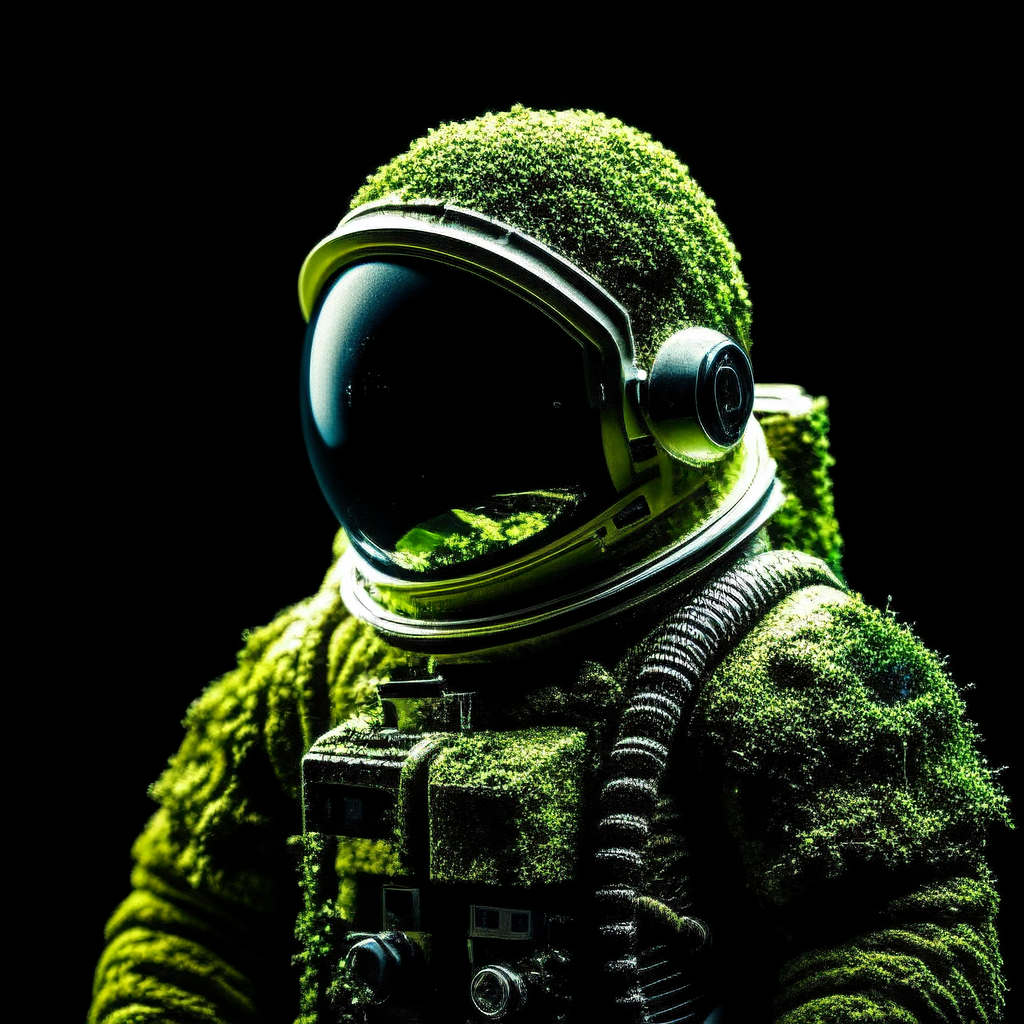

In [ ]:
uploaded = files.upload()

image_bytes = None
for obj in uploaded.values():
  image_bytes = obj

job = pipe.upscale(
    {
        'imageData': bytes_to_base64(image_bytes),
        'resize': 2 #or 4
    }
)
result = pipe.wait_for(job)['imageUrl']

show_image(result)